# webdocs

EOF
Execution time: 232.296 seconds.
128 nodes, per-node= <8 heavy+ 96 light>
1 heavy-part 128 bytes
1 light-part 832 bytes
Total size 122880 bytes, 
Precision:  0.524
heavy_are: 0.000,heavy_aae: 0.000
all_are: 584.958,all_aae: 783.098
Estimate time:   5.044 seconds.


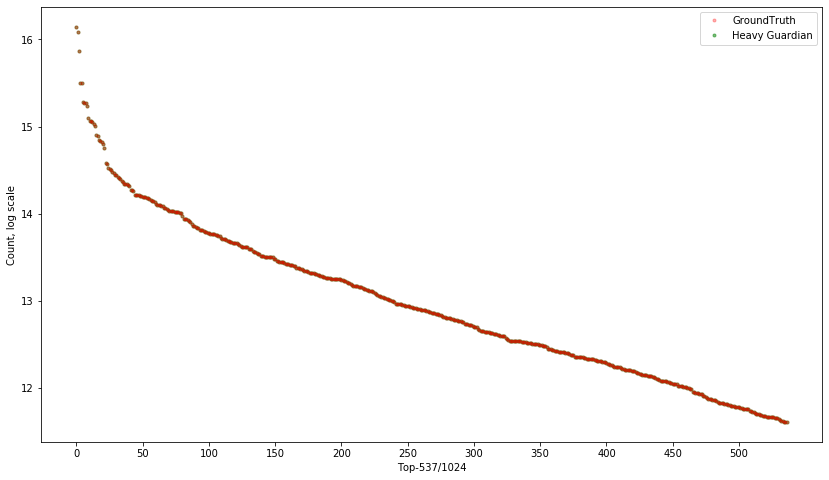

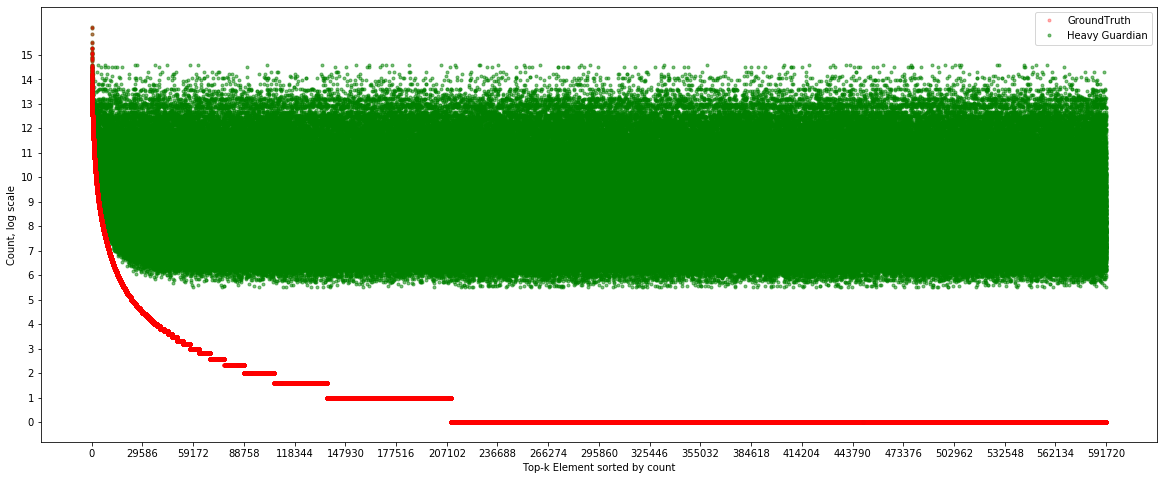

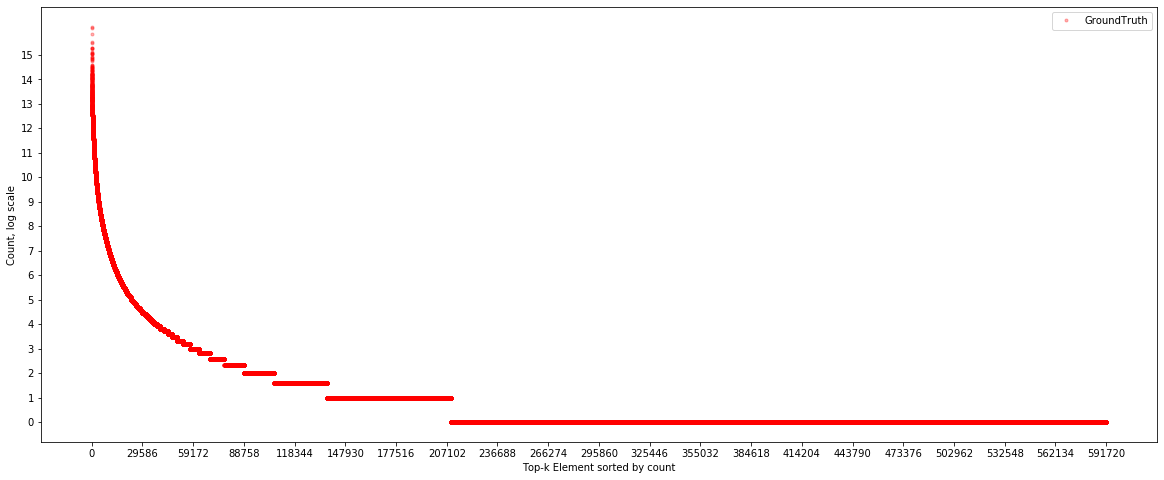

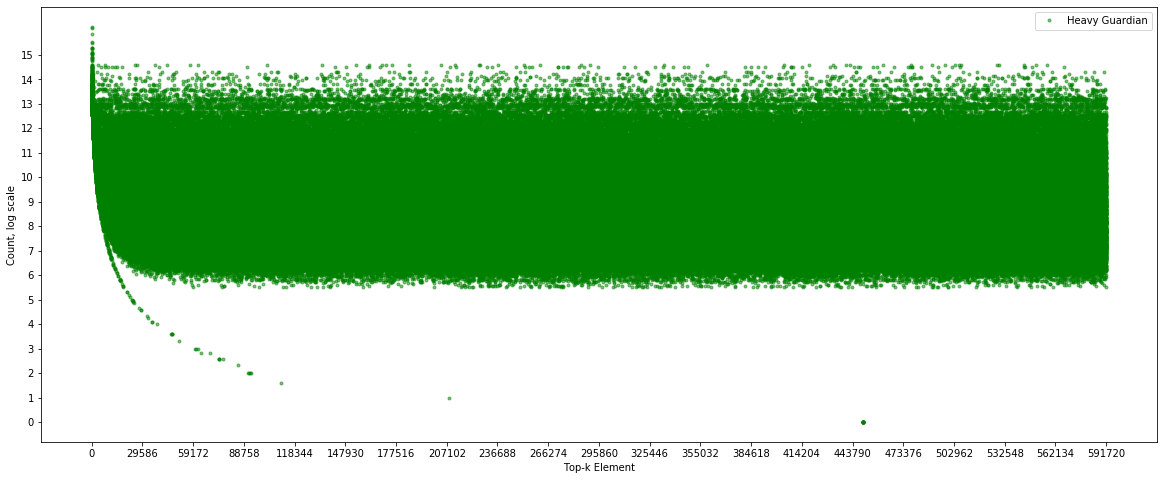

In [4]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re

# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# set default value
heavy_size=8
light_size=96
size=128
b=1.08
Config.Set_default(heavy_size,light_size,size,b)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

hg_start=time.time()
# stream processing
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# set Top-k dict
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
    # sort by count
    # heavy part of Heavy Guardian

print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))
print("1 heavy-part {} bytes".format(sys.getsizeof(HG_list[0].heavy_part)))
print("1 light-part {} bytes".format(sys.getsizeof(HG_list[0].light_part)))
print("Total size {} bytes, ".format((sys.getsizeof(HG_list[0].heavy_part)+sys.getsizeof(HG_list[0].light_part))*Config.size))


# Element-Precision
topk=Config.size*Config.heavy
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()
print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

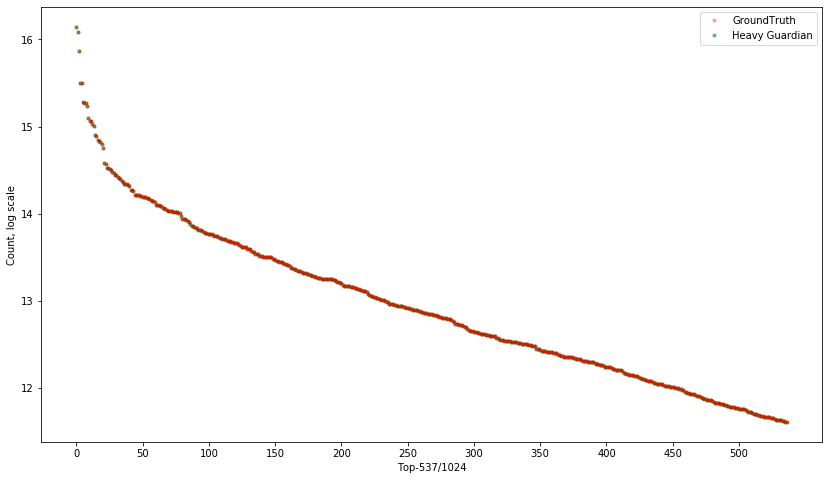

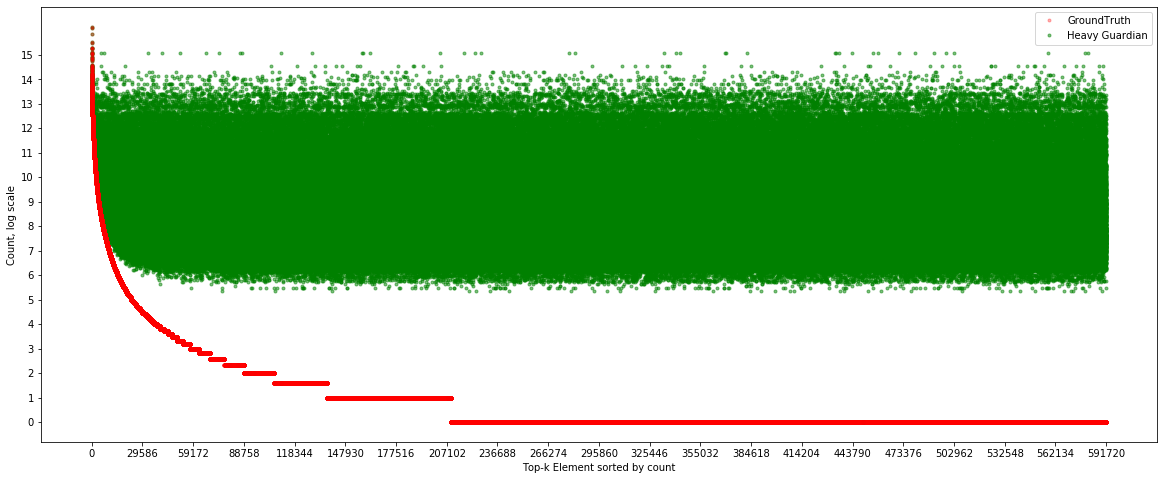

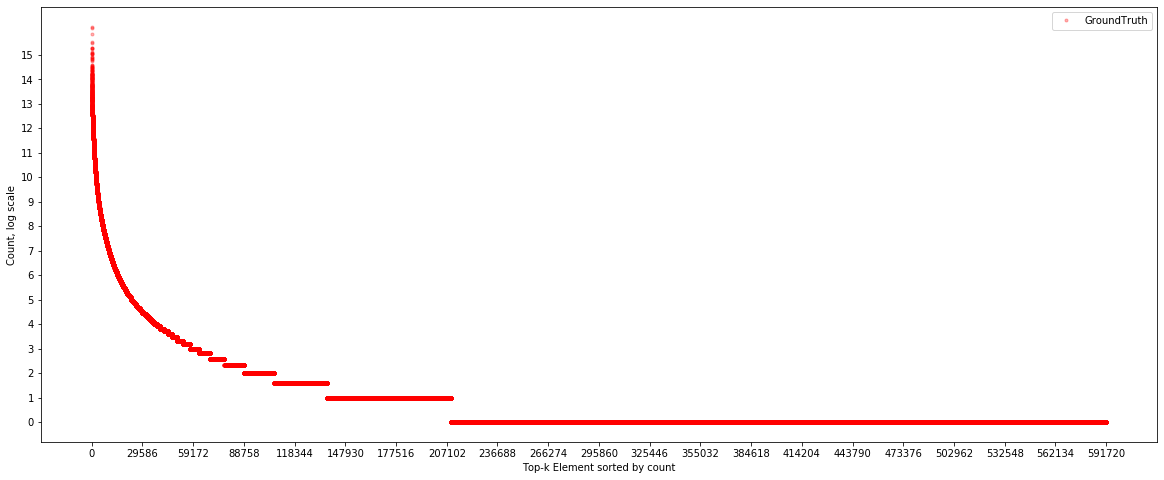

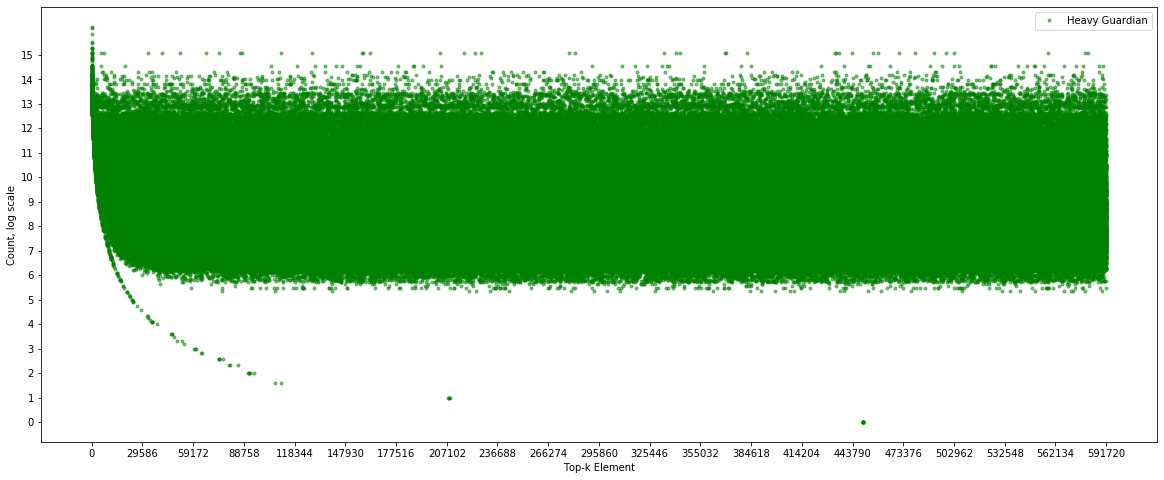

In [2]:
Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

## Caida

EOF
Execution time:  46.030 seconds.
128 nodes, per-node= <8 heavy+ 96 light>
1 heavy-part 128 bytes
1 light-part 832 bytes
Total size 122880 bytes, 
Precision:  0.156
heavy_are: 0.000,heavy_aae: 0.000
all_are:  87.281,all_aae: 180.347
Estimate time:   1.254 seconds.


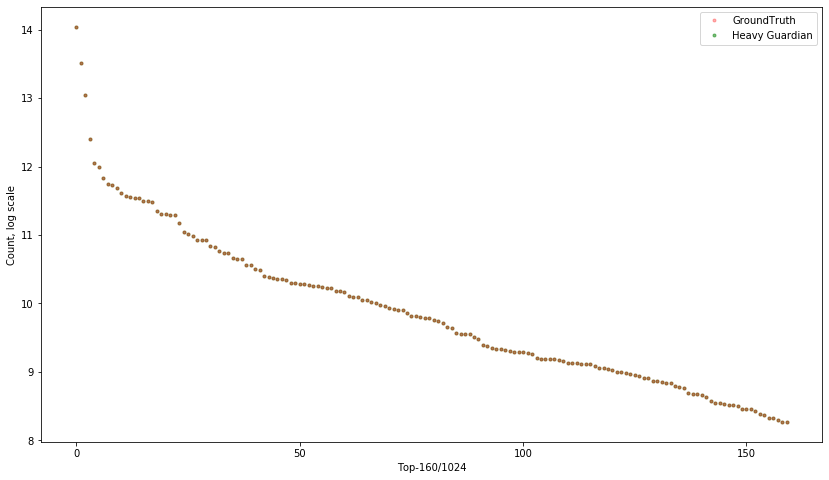

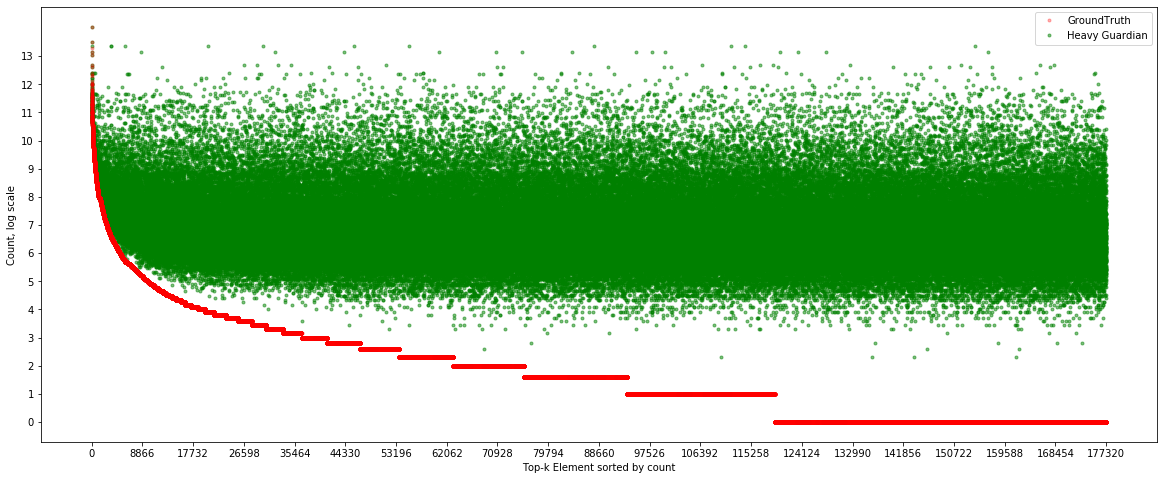

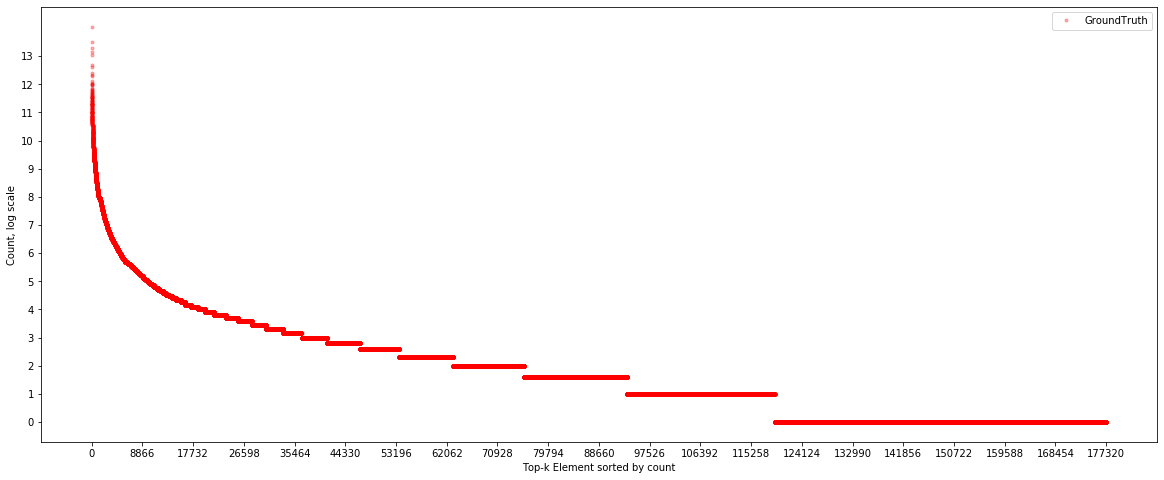

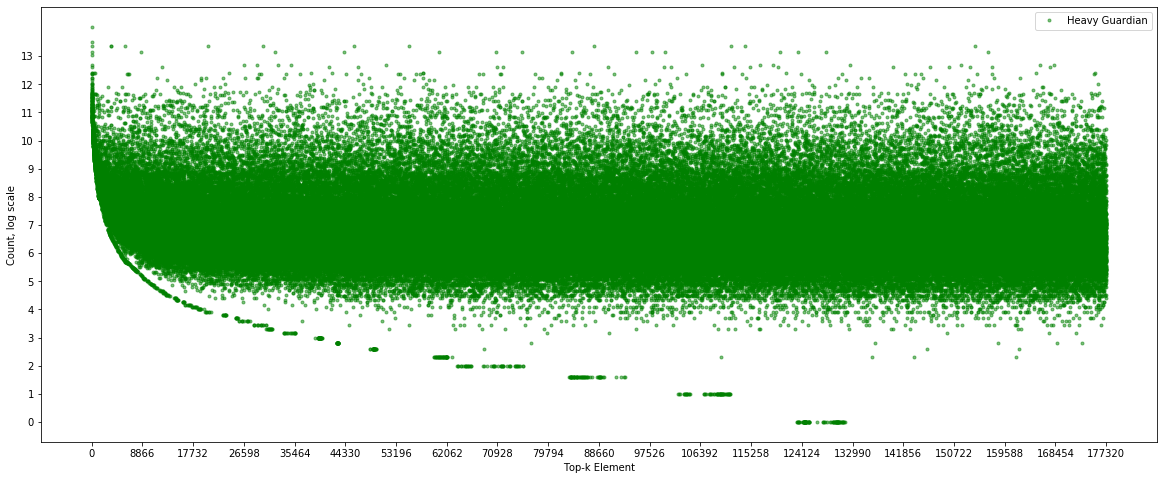

In [3]:
# caida
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re

# dataset
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='caida_0_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# set default value
heavy_size=8
light_size=96
size=128
b=1.08
Config.Set_default(heavy_size,light_size,size,b)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

hg_start=time.time()
# stream processing
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=str(file.read(13))
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# set Top-k dict
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
    # sort by count
    # heavy part of Heavy Guardian

print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))
print("1 heavy-part {} bytes".format(sys.getsizeof(HG_list[0].heavy_part)))
print("1 light-part {} bytes".format(sys.getsizeof(HG_list[0].light_part)))
print("Total size {} bytes, ".format((sys.getsizeof(HG_list[0].heavy_part)+sys.getsizeof(HG_list[0].light_part))*Config.size))


# Element-Precision
topk=Config.size*Config.heavy
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()
print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')


## kosarak

In [ ]:
# kosarak
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

# dataset
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # dataset
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth

# set default value
heavy_size=8
light_size=96
size=128
b=1.08
Config.Set_default(heavy_size,light_size,size,b)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

hg_start=time.time()
# stream processing
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            # Heavy part insert
            #item_count-=1
            item=HG.Node(str(e),1)
            HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# set Top-k dict
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
    # sort by count
    # heavy part of Heavy Guardian

print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))
print("1 heavy-part {} bytes".format(sys.getsizeof(HG_list[0].heavy_part)))
print("1 light-part {} bytes".format(sys.getsizeof(HG_list[0].light_part)))
print("Total size {} bytes, ".format((sys.getsizeof(HG_list[0].heavy_part)+sys.getsizeof(HG_list[0].light_part))*Config.size))


# Element-Precision
topk=Config.size*Config.heavy
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()
print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')


In [ ]:
import mmh3
import Config
import os
import time
import random
import operator
import sys
from memory_profiler import profile

class Node():
    def __init__(self,ID='Null',count=0):
        self.count=count
        self.ID=str(ID)
    def __str__(self):
        return '({},{})'.format(self.ID,self.count)
    def __repr__(self):
        return '({},{})'.format(self.ID,self.count)
    
class HeavyGuardian():
    def __init__(self,light_size=0):
        self.heavy=[]
        self.light=[0]*light_size
    def __str__(self):
        return '[H:{}L:{}]\n'.format(self.heavy,self.light)
    def __repr__(self):
        return '[H:{}L:{}]\n'.format(self.heavy,self.light)


# ==========================main=========================
def main():
    filename='kosarak.dat'
    filepath=r"..\dataset\kosarak"
    src_data=os.path.join(filepath,filename)

    heavy_size=16
    light_size=4096
    size=256
    # 128*32=4096, top 4096+sketch 128*32
    b=1.08
    Config.Set_default(heavy_size,light_size,size,b)

    HG_list=[HeavyGuardian(Config.light) for _ in range(Config.size)]
        # error reference by using [HG()]*size

    item_count=50

    start=time.time()
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            #print("\nread {}".format(e))
            if not e:
                print('EOF')
                break
            else:
                # Heavy part insert
                #item_count-=1

                item=Node(str(e),1)
                h_index,l_index=Func.position(item)
                    # bucket index & light part index
                n_index=find(item,HG_list[h_index].heavy)
                    # node index
                if n_index<0:
                    # not found in HG_list[i].heavy[j]
                    if len(HG_list[h_index].heavy)<Config.heavy:
                        # HG_list[h_index] is not full
                        HG_list[h_index].heavy.append(item)
                        n_index=len(HG_list[h_index].heavy)-1
                    else:
                        #exponential decay
                        if HG_list[h_index].heavy[-1].count-Decay(HG_list[h_index].heavy[-1])==0:
                            HG_list[h_index].heavy[-1].ID=item.ID
                            HG_list[h_index].heavy[-1].count=1
                        else:
                            # Light part insert
                            HG_list[h_index].light[l_index]+=1
                else:
                    HG_list[h_index].heavy[n_index].count+=1
                    if n_index==0 or HG_list[h_index].heavy[n_index].count< HG_list[h_index].heavy[n_index-1].count:
                        pass
                    else:
                        HG_list[h_index].heavy.sort(key=operator.attrgetter('count'),reverse=True)                       
    end=time.time()
    print("Execution time:{:8.3f} seconds.".format(end-start))
    #print("Total memory {} bytes=".format(sys.getsizeof(Top)+Sketch.nbytes+sys.getsizeof(Sk_head[0])*Config.depth),end='')
    #print(HG_list)
    hg_dict=dict()
    for i in range(len(HG_list)):
        for j in range(len(HG_list[i].heavy)):
            hg_dict[HG_list[i].heavy[j].ID]=HG_list[i].heavy[j].count
    return(HG_list,hg_dict)
    
if __name__=='__main__':
    alist,adict=main()

In [ ]:
import pandas as pd


length=Config.size*Config.heavy
gr_dir=r"..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
gr_path=os.path.join(gr_dir,gr_file_name)
grtruth=pd.read_csv(gr_path)
gt_set=set(grtruth['Element'][:length])

'''
hg_df=pd.DataFrame(adict.items(),columns=['ID','Count'])
hg_df=hg_df.sort_values(by='Count',ascending=False)
hg_set=set(hg_df['ID'])
'''

hg_set=set(adict.keys())
tp_set=gt_set & hg_set
precision=len(tp_set)/len(hg_set)
print(precision)

In [ ]:
https://pypi.org/project/memory-profiler/

cmd
python -m memory_profiler m_profile.py